In [1]:
from ela_feature_definition import ela_feature_names
import pandas as pd
import random
import numpy as np

In [73]:
def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(42)

In [86]:
cluster_12_df = pd.read_csv('data/hierarchical_clustering_12.csv',index_col=[0,1,2])
cluster_label_column='clustering_12_clusters'
cluster_sizes=pd.DataFrame(cluster_12_df[cluster_label_column]).value_counts()
max_cluster_size=cluster_sizes.max()
largest_cluster_id = cluster_sizes[cluster_sizes==max_cluster_size].index[0][0]
print(largest_cluster_id)
ela=cluster_12_df[cluster_12_df[cluster_label_column]==largest_cluster_id]
ela=ela[set(ela_feature_names).intersection(ela.columns)]
removed_instances=cluster_12_df[cluster_12_df[cluster_label_column]!=largest_cluster_id]
initial_cluster_count=cluster_sizes.shape[0]

0


In [87]:
initial_cluster_count

12

In [88]:
ela.shape

(190, 63)

In [89]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [90]:
ela.shape

(190, 63)

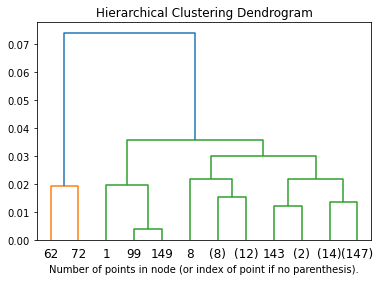

In [91]:
metric='cosine'
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity =metric
                                           ,linkage='average')

agglomerative = agglomerative.fit(ela)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

In [92]:
from sklearn.cluster import *
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import *
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from pathlib import Path
clustering_results={}
df=ela
for i in range(2, 60):
    results_for_cluster={}
    cluster_name = f'cluster_{i}'
    labels =  AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='complete').fit(df).labels_
    results_for_cluster['labels'] = labels
    samples_per_cluster={k[0]:v for k,v in pd.DataFrame(labels).value_counts().to_dict().items()}
    results_for_cluster['samples_per_cluster']=samples_per_cluster
    results_for_cluster['silhouette_score'] = metrics.silhouette_score(df, labels, metric='cosine')
    sample_silhouette_values = metrics.silhouette_samples(df, labels, metric='cosine')
    clustering_results[cluster_name]=results_for_cluster

In [93]:
clustering_results_df=pd.DataFrame(clustering_results).T

In [94]:
clustering_results_df

,labels,samples_per_cluster,silhouette_score
cluster_2,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","{1: 173, 0: 17}",0.73953
cluster_3,"[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...","{0: 173, 1: 15, 2: 2}",0.708954
cluster_4,"[0, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...","{0: 157, 3: 16, 1: 15, 2: 2}",0.624405
cluster_5,"[0, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...","{0: 154, 3: 16, 1: 15, 4: 3, 2: 2}",0.638461
cluster_6,"[3, 1, 0, 0, 0, 5, 0, 0, 0, 5, 5, 3, 0, 0, 5, ...","{3: 129, 5: 25, 1: 16, 0: 15, 4: 3, 2: 2}",0.612011
cluster_7,"[1, 0, 6, 6, 6, 5, 6, 3, 3, 5, 5, 1, 3, 3, 5, ...","{1: 129, 5: 25, 0: 16, 6: 8, 3: 7, 4: 3, 2: 2}",0.626204
cluster_8,"[1, 0, 6, 6, 6, 5, 6, 3, 3, 5, 5, 1, 3, 3, 5, ...","{1: 129, 5: 25, 7: 13, 6: 8, 3: 7, 0: 3, 4: 3,...",0.622669
cluster_9,"[0, 8, 6, 6, 6, 5, 6, 1, 1, 5, 5, 0, 1, 1, 5, ...","{0: 129, 5: 25, 3: 13, 6: 8, 1: 7, 4: 3, 2: 2,...",0.61952
cluster_10,"[5, 8, 6, 6, 6, 2, 6, 1, 1, 2, 2, 5, 1, 1, 2, ...","{5: 119, 2: 25, 3: 13, 9: 10, 6: 8, 1: 7, 4: 3...",0.64619
cluster_11,"[2, 8, 6, 6, 6, 0, 6, 1, 1, 0, 0, 2, 1, 1, 0, ...","{2: 119, 0: 25, 3: 13, 9: 10, 6: 8, 1: 7, 4: 3...",0.64104


In [95]:
selected_cluster_counts = [10,15,21,34,46,48]

In [96]:
metric='cosine'
for cluster_count in selected_cluster_counts:
    agglomerative = AgglomerativeClustering(n_clusters=cluster_count,affinity =metric ,linkage='complete')
    labels=agglomerative.fit(ela).labels_
    elements_per_cluster = pd.DataFrame(labels).value_counts()
    ela[f'subclustering_{cluster_count}_clusters']=[initial_cluster_count + l for l in labels]
    removed_instances[f'subclustering_{cluster_count}_clusters']=removed_instances[cluster_label_column]

/tmp/ipykernel_18469/366114174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_instances[f'subclustering_{cluster_count}_clusters']=removed_instances[cluster_label_column]
/tmp/ipykernel_18469/366114174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_instances[f'subclustering_{cluster_count}_clusters']=removed_instances[cluster_label_column]
/tmp/ipykernel_18469/366114174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [97]:
all_instances=ela.append(removed_instances)

In [98]:
all_instances.shape

(221, 70)

In [99]:
all_instances.to_csv('data/subclustering.csv')